In [ ]:
%matplotlib widget

In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path
from wind_tools import *
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18,10)

## Load data

In [ ]:
proc_dir = Path("2020_data/data_field_v2_from_20208010/preprocessed")

m6_path = proc_dir / "20200810-1430_TRS_M00506_com3.csv"
wm1_path = proc_dir / "20200810-1430_WM_174605_com1_raw.csv"

In [ ]:
m6rwp_path = proc_dir / "20200810-1430_TRS_M00506_com3_raw.csv"
m6rwp = pd.read_csv(m6rwp_path)

In [ ]:
m6rw_path = proc_dir / "../raw/20200810-1430_TRS_M00506_com3.raw",

m6rw = pd.DataFrame(np.genfromtxt(m6rw_path[0], usecols=(10, 12, 14, 16), invalid_raise=False))
m6rw.columns = list('uvwt')

In [ ]:
wm1 = pd.read_csv(wm1_path)
m6 = pd.read_csv(m6_path)

In [ ]:
wm1

,u,v,w,t
0,-1.62,-2.78,0.26,NaN
1,-1.93,-3.08,-0.21,NaN
2,-1.26,-3.29,-0.37,NaN
3,-1.09,-3.37,-0.84,NaN
4,-0.93,-3.46,-0.97,NaN
...,...,...,...,...
18002,-1.08,-1.07,0.27,NaN
18003,-0.82,-0.96,0.00,NaN
18004,-1.47,-0.33,0.05,NaN
18005,-1.43,-0.17,0.23,NaN


In [ ]:
m6

,u,v,w,t
0,2.24,-3.58,-0.04,28.74
1,1.86,-3.25,-0.15,28.87
2,1.87,-3.15,-0.19,28.97
3,1.83,-2.83,-0.20,28.64
4,2.15,-3.25,0.07,28.69
...,...,...,...,...
17996,-0.98,-1.22,-0.15,31.10
17997,-0.57,-1.38,0.22,31.12
17998,-0.51,-1.49,0.29,31.00
17999,-0.41,-1.35,0.28,31.08


In [ ]:
m6rw

,u,v,w,t
0,1.36,2.17,-0.35,30.88
1,1.42,2.49,-0.24,31.14
2,0.99,2.75,-0.02,31.01
3,0.59,2.43,-0.16,30.81
4,0.41,2.09,0.03,30.67
...,...,...,...,...
17996,0.59,0.27,-0.27,31.86
17997,0.91,0.38,0.04,31.62
17998,1.12,0.20,-0.08,31.86
17999,1.06,0.32,-0.01,32.07


In [ ]:
plot_components([m6, m6rw])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

array([<AxesSubplot:title={'center':'u'}>,
       <AxesSubplot:title={'center':'v'}>,
       <AxesSubplot:title={'center':'w'}>], dtype=object)

In [ ]:
m6.describe()

,u,v,w,t
count,18001.000000,18001.000000,18001.000000,18001.000000
mean,0.460307,-2.166775,-0.093899,29.608067
std,1.086671,1.201237,0.305244,0.670030
min,-3.490000,-7.670000,-1.350000,27.350000
25%,-0.200000,-2.930000,-0.290000,29.170000
50%,0.310000,-2.120000,-0.100000,29.540000
75%,1.100000,-1.370000,0.090000,29.930000
max,5.910000,2.570000,1.760000,33.910000


In [ ]:
m6rw.v.describe()

count    18001.000000
mean         0.460307
std          1.086671
min         -3.490000
25%         -0.200000
50%          0.310000
75%          1.100000
max          5.910000
Name: v, dtype: float64

In [ ]:
def side_by_side(*objs, **kwds):
    ''' Une fonction print objects side by side '''
    from pandas.io.formats.printing import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print(adjoin(space, *reprs))

In [ ]:
side_by_side(m6rw.v.describe(), m6.u.describe())

count    18001.000000      count    18001.000000  
mean         0.460307      mean         0.460307  
std          1.086671      std          1.086671  
min         -3.490000      min         -3.490000  
25%         -0.200000      25%         -0.200000  
50%          0.310000      50%          0.310000  
75%          1.100000      75%          1.100000  
max          5.910000      max          5.910000  
Name: v, dtype: float64    Name: u, dtype: float64


In [ ]:
side_by_side(m6rw.u.describe(), -m6.v.describe())

count    18001.000000      count   -18001.000000  
mean         2.166775      mean         2.166775  
std          1.201237      std         -1.201237  
min         -2.570000      min          7.670000  
25%          1.370000      25%          2.930000  
50%          2.120000      50%          2.120000  
75%          2.930000      75%          1.370000  
max          7.670000      max         -2.570000  
Name: u, dtype: float64    Name: v, dtype: float64


In [ ]:
test_close(-m6rw.u, m6.v)

In [ ]:
wm1, m6 = map(add_wind_speed, [wm1, m6])

In [ ]:
plot_components([wm1, m6], ['wind_speed'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

array([<AxesSubplot:title={'center':'wind_speed'}>], dtype=object)

In [ ]:
plot_components([wm1r], vertical=False )

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

array([<AxesSubplot:title={'center':'u'}>,
       <AxesSubplot:title={'center':'v'}>,
       <AxesSubplot:title={'center':'w'}>], dtype=object)

In [ ]:
test_close(m6rw, m6rwp)

In [ ]:
m6rwp

,u,v,w,t
0,3.58,2.24,-0.04,28.74
1,3.25,1.86,-0.15,28.87
2,3.15,1.87,-0.19,28.97
3,2.83,1.83,-0.20,28.64
4,3.25,2.15,0.07,28.69
...,...,...,...,...
17996,1.22,-0.98,-0.15,31.10
17997,1.38,-0.57,0.22,31.12
17998,1.49,-0.51,0.29,31.00
17999,1.35,-0.41,0.28,31.08


In [ ]:
wm1r = rotate_wind_ang(wm1, 310)

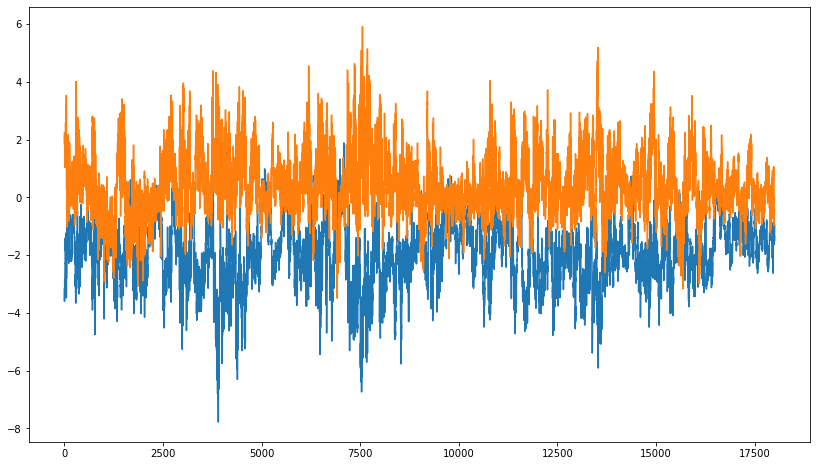

In [ ]:
plt.plot(wm1r.u)
plt.plot(m6.u)

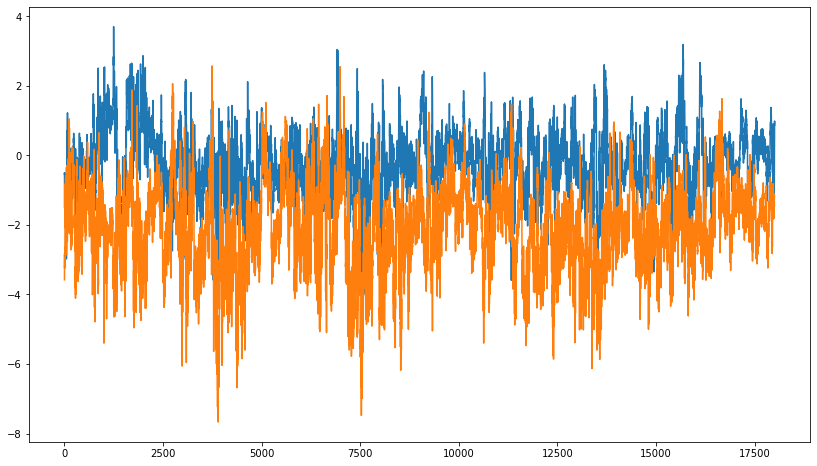

In [ ]:
plt.plot(wm1r.v)
plt.plot(m6.v)

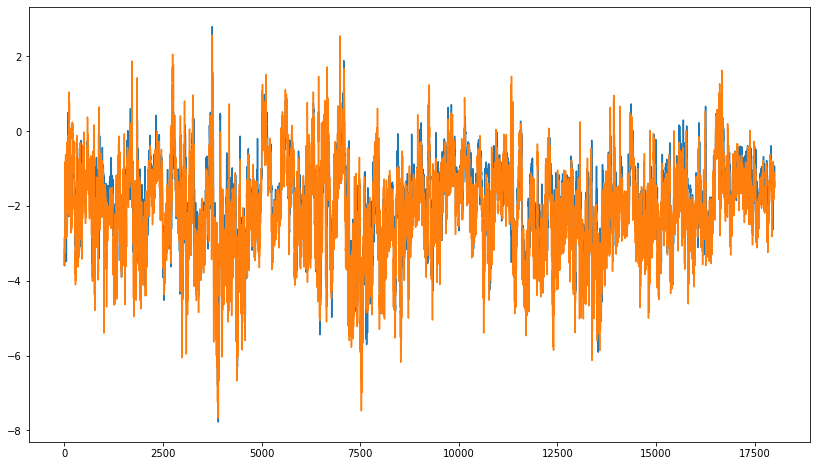

In [ ]:
plt.plot(wm1r.u)
plt.plot(m6.v)

array([<AxesSubplot:title={'center':'u'}>], dtype=object)

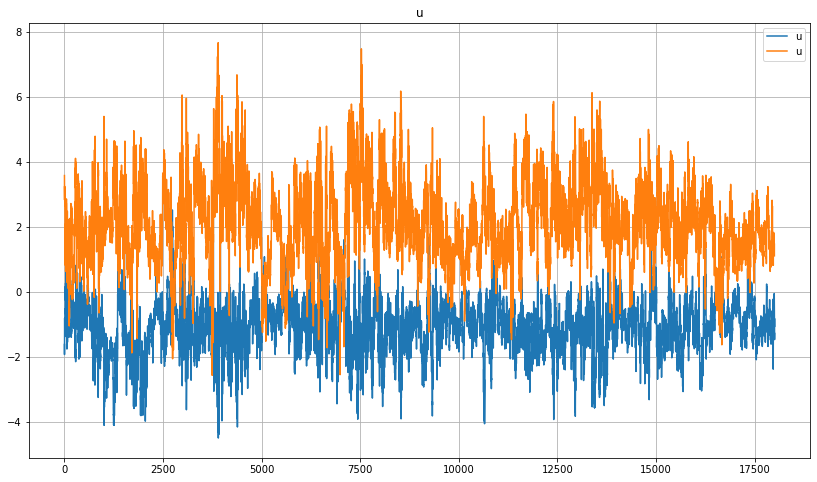

In [ ]:
plot_components([wm1, m6], 'u')

array([<AxesSubplot:title={'center':'u'}>], dtype=object)

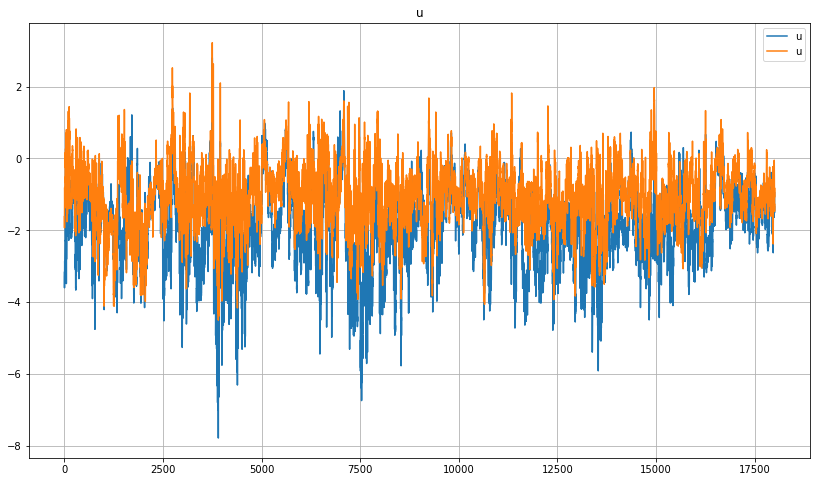

In [ ]:
plot_components([wm1r, wm1], 'u')

In [ ]:
plot_components_scatter([wm1[:18000], m6[:18000]], 'u')

array([<AxesSubplot:title={'center':'w'}>], dtype=object)

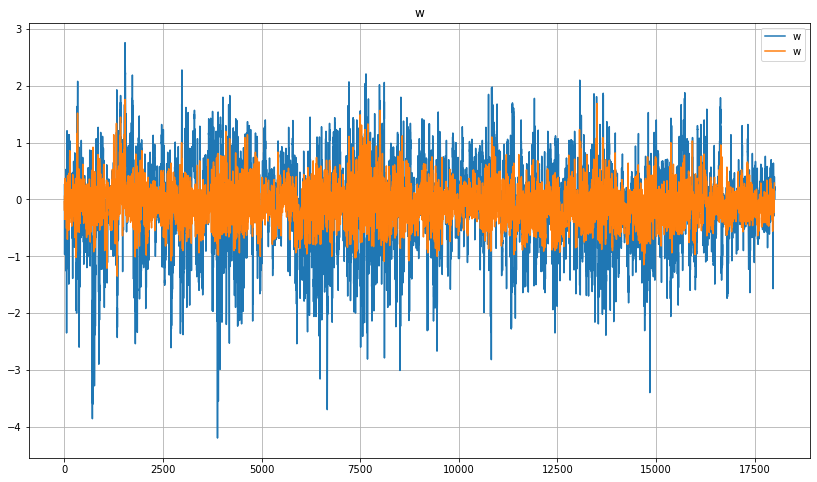

In [ ]:
plot_components([wm1, m6], 'w')

In [ ]:
plot_components_scatter([wm1[:18000], m6[:18000]], 'w')